In [3]:
import sys
import collections
import matplotlib.pyplot as plt
import numpy as np

In [52]:
wn11_te = './WN11/test.txt'
wn11_tr = './WN11/train.txt'
wn11_up = './WN11/update.txt'

fb13_te = './FB13/test.txt'
fb13_tr = './FB13/train.txt'
fb13_up = './FB13/update.txt'

wn18_te = './WN18/test.txt'
wn18_tr = './WN18/train.txt'
wn18_up = './WN18/update.txt'

fb15k_te = './FB15k/test.txt'
fb15k_up = './FB15k/update.txt'

In [5]:
def re2id(relation):
    r2id = collections.defaultdict(int)
    id2r = collections.defaultdict(str)
    i = 0
    for v,k in relation.items():
        r2id[v] = i
        id2r[i] = v
        i += 1
    return r2id,id2r

In [6]:
def get_relation(filename):
    relation = collections.defaultdict(int)
    content = open(filename,'r')
    for con in content:
        con = con.split()
        relation[con[1]] += 1
    return relation

In [7]:
wn11_test = get_relation(wn11_te)
wn11_update = get_relation(wn11_up)
wn11_train = get_relation(wn11_tr)

In [8]:
tmp,tmp2 = re2id(wn11_test)

In [9]:
def draw(name,data_set):
    r = []
    num = []
    for v,k in data_set.items():
        r.append(v)
        num.append(k)
        
    x = np.arange(len(r))
    
    ax1 = plt.axes([0.16,0.12,0.77,0.77])
    ax1.barh(x,num,align='center',alpha=0.5)
    ax1.set_yticks(x)
    ax1.set_yticklabels(r)
   # plt.ylim(-10,10)
    plt.title(name)
    plt.show()
    

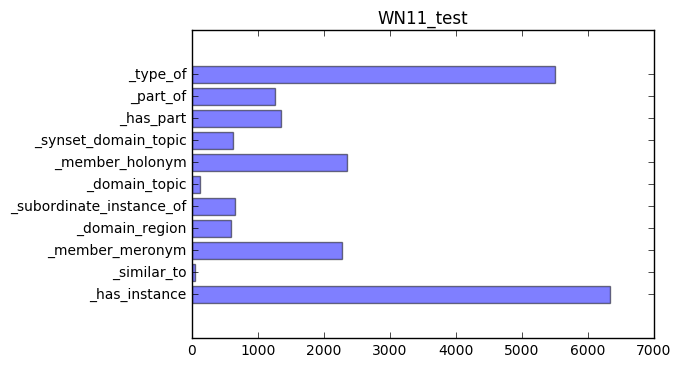

In [10]:
draw('WN11_test',wn11_test)

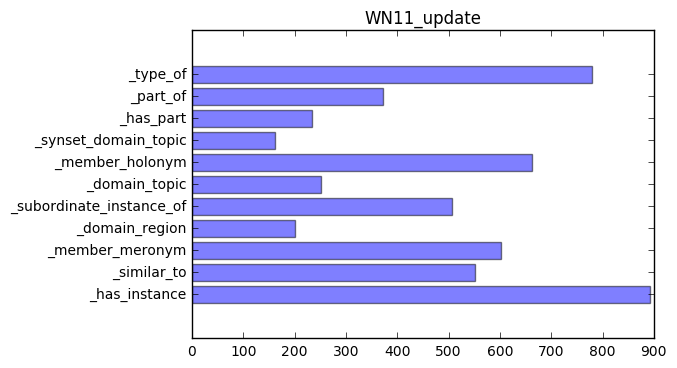

In [11]:
draw('WN11_update',wn11_update)

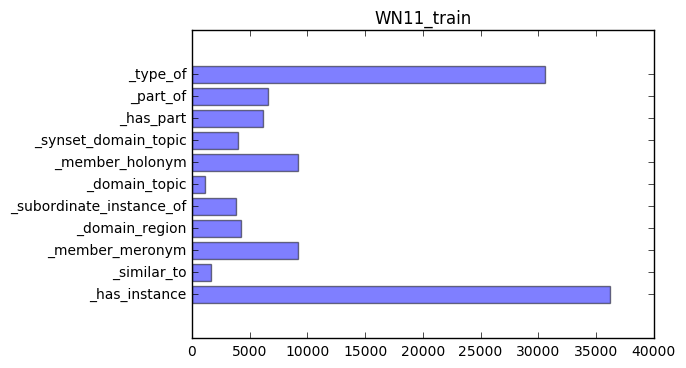

In [12]:
draw('WN11_train',wn11_train)

In [53]:
fb13_test = get_relation(fb13_te)
fb13_update = get_relation(fb13_up)
fb13_train = get_relation(fb13_tr)

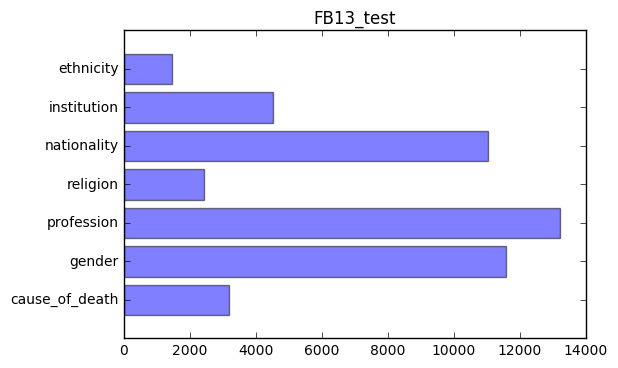

In [14]:
draw('FB13_test',fb13_test)

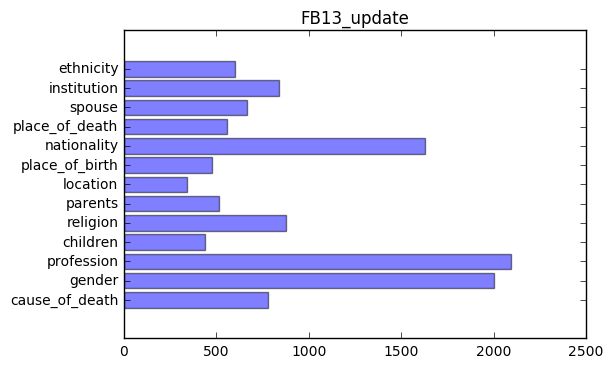

In [15]:
draw('FB13_update',fb13_update)

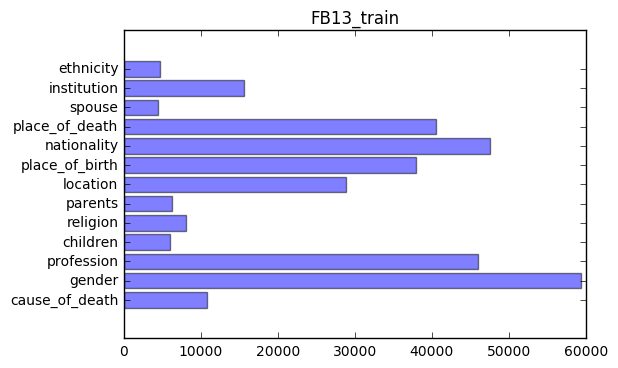

In [54]:
draw('FB13_train',fb13_train)

In [16]:
wn18_test = get_relation(wn18_te)
wn18_train = get_relation(wn18_tr)
wn18_update = get_relation(wn18_up)

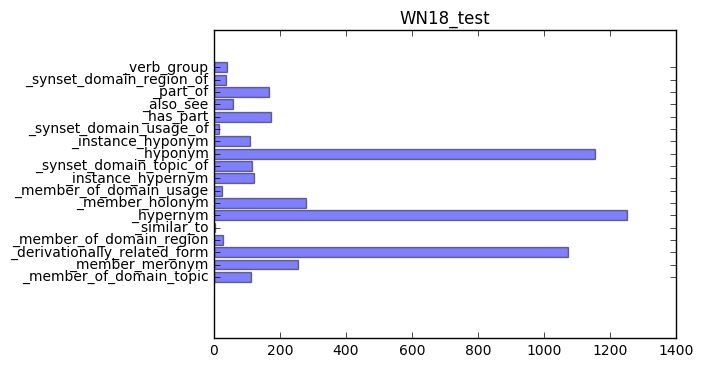

In [17]:
draw('WN18_test',wn18_test)

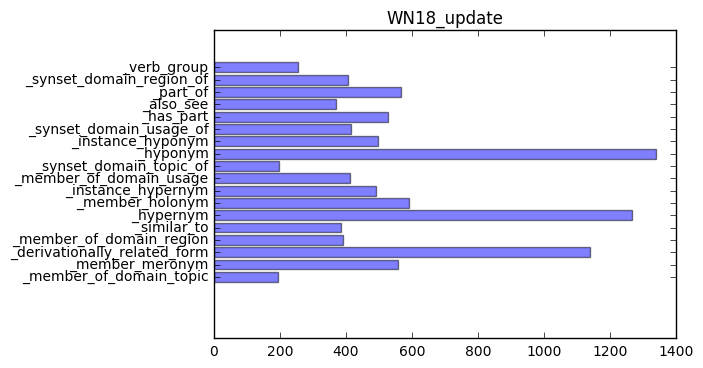

In [18]:
draw('WN18_update',wn18_update)

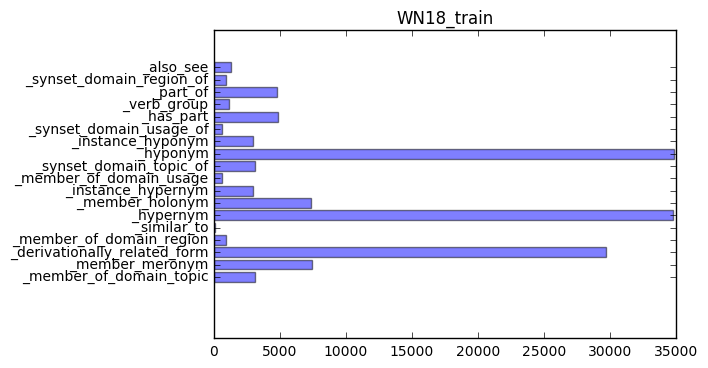

In [48]:
draw('WN18_train',wn18_train)

In [19]:
fb15k_test = get_relation(fb15k_te)
fb15k_update = get_relation(fb15k_up)

In [20]:
def get_entity(filename):
    entitys = collections.defaultdict(int)
    content = open(filename,'r')
    for con in content:
        con = con.split()
        entitys[con[0]] += 1
        entitys[con[1]] += 1
    return entitys

In [21]:
wn11_update_en = get_entity(wn11_up)

In [22]:
len(list(wn11_update_en.values()))

4300

In [23]:
wn11_test_en = get_entity(wn11_te)
len(list(wn11_test_en.values()))

6934

In [41]:
def get_joint_entity(data1,data2):
    joint_entity = []
    entity = []
    
    if len(data1.values()) > len(data2.values()):
    
        for v in data1.values():
            entity.append(v)
        for v in data2.values():
            if v in entity:
                joint_entity.append(v)
    else:
        
        for v in data2.values():
            entity.append(v)
        for v in data1.values():
            if v in entity:
                joint_entity.append(v)
        

    
    return joint_entity
    

In [42]:
wn11_joint_en = get_joint_entity(wn11_test_en,wn11_update_en)

In [47]:
print len(wn11_test_en)
print len(wn11_update_en)
len(wn11_joint_en)

6934
4300


431

In [44]:
fb13_test_en = get_entity(fb13_te)
fb13_update_en = get_entity(fb13_up)
print len(fb13_test_en)
print len(fb13_update_en)
fb13_joint_en = get_joint_entity(fb13_test_en,fb13_update_en)
len(fb13_joint_en)

17753
10407


999

In [45]:
wn18_test_en = get_entity(wn18_te)
wn18_update_en = get_entity(wn18_up)
print len(wn18_test_en)
print len(wn18_update_en)

wn18_joint_en = get_joint_entity(wn18_test_en,wn18_update_en)
len(wn18_joint_en)

4367
7752


4351

In [46]:
fb15k_test_en = get_entity(fb15k_te)
fb15k_update_en = get_entity(fb15k_up)

print len(fb15k_test_en)
print len(fb15k_update_en)

fb15k_joint_en = get_joint_entity(fb15k_test_en,fb15k_update_en)
len(fb15k_joint_en)

13258
15722


13161